In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import numpy as np

In [2]:
# 한글출력
import matplotlib
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

In [3]:
df_raw = pd.read_csv('체질검사.csv', encoding = 'cp949')
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76, 13)


In [4]:
rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.981
Score on test set : 0.584


In [5]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.589
6,70,0.963,0.590
7,80,0.970,0.584
8,90,0.976,0.585
9,100,0.981,0.584


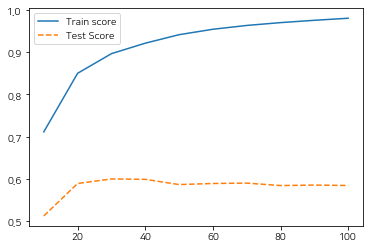

In [6]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.legend()


In [7]:
train_score = []; test_score = [];

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.596
2,3,0.896,0.595
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


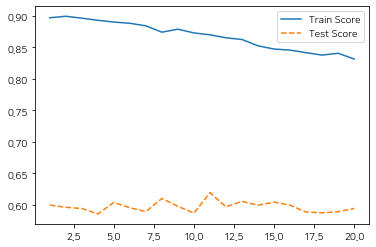

In [8]:
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [9]:
train_score = []; test_score = [];

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = 11,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.870,0.620
1,4,0.870,0.620
2,6,0.870,0.620
3,8,0.870,0.620
4,10,0.870,0.620
5,12,0.870,0.620
6,14,0.870,0.620
7,16,0.870,0.620
8,18,0.870,0.620
9,20,0.870,0.620


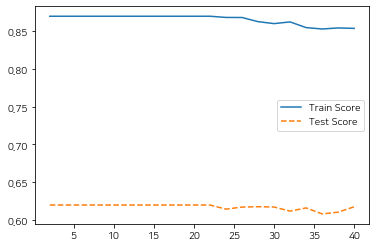

In [10]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [11]:
train_score = []; test_score = [];

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = 11,
                              min_samples_split = 22,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


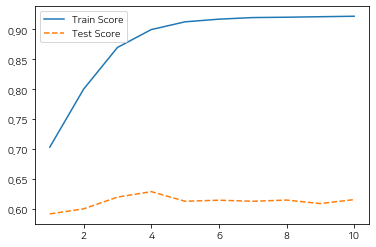

In [12]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [15]:
train_score = []; test_score = [];

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf = GradientBoostingRegressor(random_state = 1234,
                              n_estimators = 30,
                              min_samples_leaf = 11,
                              min_samples_split = 22,
                              max_depth = 4,
                              learning_rate = v_learning_rate)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['MinSamplesSplit'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

df_score_lr.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464


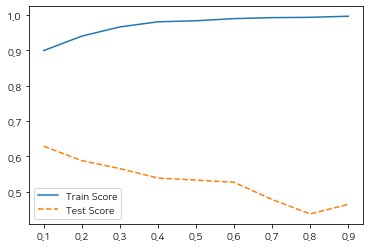

In [16]:
plt.plot(para_lr, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [17]:
rf_final = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = 30,
                                min_samples_leaf = 11,
                                min_samples_split = 22,
                                max_depth = 4,
                                learning_rate = 0.1)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(rf_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(rf_final.score(df_test_x, df_test_y)))

score on training set : 0.8996509846110846
score on test set : 0.6288342830057724


Text(0, 0.5, '변수')

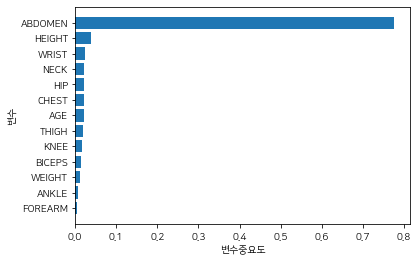

In [20]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [22]:
# GridCV
estimator = GradientBoostingRegressor()

param_grid = {"criterion" : ["mse", "friedman_mse","mae"],
             "max_features" : ["auto","sqrt","log2"],
             "min_samples_leaf" : para_leaf,
             "min_samples_split" : para_split,
             "learning_rate" : para_lr}
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2",
                      n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model :
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=12,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

best parameter : 
{'criterion': 'mse', 'learning_rate': 0.1, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 12}

best score : 
0.702


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
